# inferencial statistik (why we need)
* mengambil kesimpulan dari populasi berdasarkan sampel
* membandingkan sample dari populasi apakah sample kita benar-benar berbeda dari populasi
* model machine learning - justifikasi menambahkan atau mengurangi ciri
* menguji hipotesa

Random variable : variable yang kita amati dan nilainya dari fenomena acak (contoh penghasilan setiap orang berbeda) :
* diskrit 1,2,3,4,5,6 (ex:jumlah orang, jumlah kendaraan) (curva disebut mass curve)
* kontinu 1.24, 1.26 (ex : pendapatan, curah hujan, tinggi badan) (curva disebut dencity curve)

In [1]:
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns

In [2]:
from scipy.stats import uniform

In [6]:
n = 10000
start = 10
width = 20
dat_uniform = uniform.rvs(size=n, loc=start, scale=width)
dat_uniform

array([18.81016383, 23.91068951, 14.55099966, ..., 18.77760332,
       25.03966035, 15.50496184])

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Uniform DIS'), Text(0, 0.5, 'frequency')]

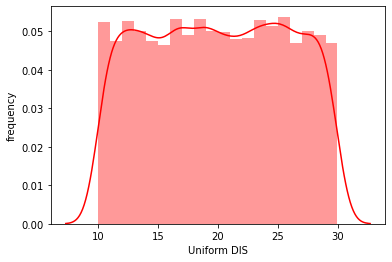

In [11]:
data_plot = sns.distplot(dat_uniform, bins=20, color="red")
data_plot.set(xlabel= "Uniform DIS", ylabel = "frequency")
#uniform distribusi

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


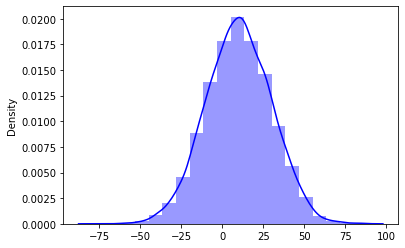

In [31]:
#Normal Distribution
from scipy.stats import norm
dat_norm = norm.rvs(size=n, loc=start, scale=width,random_state=None)
dat_norm
norm_plot = sns.distplot(dat_norm, bins=20, color="blue")

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


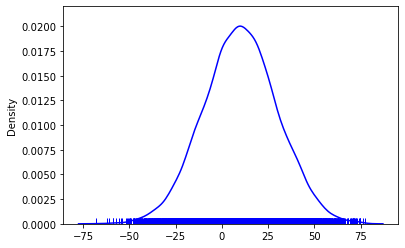

In [17]:
norm_plot = sns.distplot(dat_norm, rug=True, hist=False, bins=20, color="blue")

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

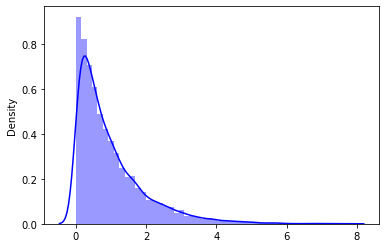

In [35]:
#gamma distribution (chi-squared)
from scipy.stats import gamma
dat_gamma = gamma.rvs(size=n, a=1)
dat_gamma = sns.distplot(dat_gamma, bins=50, color="blue")
dat_gamma


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

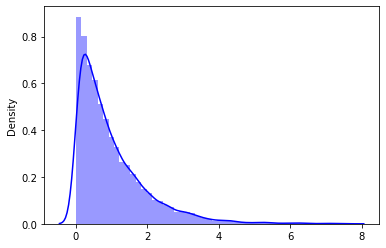

In [39]:
#eksponential
from scipy.stats import expon
dat_expon = expon.rvs(scale=1, loc=0, size=n)
dat_expon = sns.distplot(dat_expon, bins=50, color="blue")
dat_expon

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

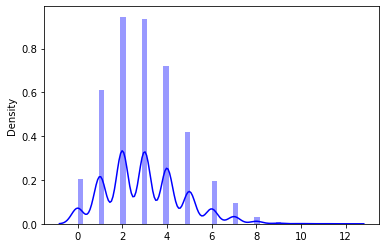

In [44]:
from scipy.stats import poisson
dat_poisson = poisson.rvs(size=n, mu=3)
dat_poisson = sns.distplot(dat_poisson, bins=50, color="blue")
dat_poisson

In [47]:
#confidance interval (seberapa akurat rata-rata sample dibandingkan dengan rata-rata populasi)
import pandas as pd
import numpy as np
df=pd.read_csv('Heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [49]:
df["sex_name"]=df.sex.replace({1 : "Male", 0 : "Female"})
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_name
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,Male
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,Male
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,Male
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,Female


In [56]:
df_sex_target=df[["target","sex_name"]].dropna()

In [57]:
df_sex_target

,target,sex_name
0,0,Male
1,0,Male
2,0,Male
3,0,Male
4,0,Female
...,...,...
1020,1,Male
1021,0,Male
1022,0,Male
1023,1,Female


In [59]:
agregate_heart_dc=pd.crosstab(df_sex_target['target'],df_sex_target['sex_name'])
agregate_heart_dc

sex_name,Female,Male
target,,
0,86,413
1,226,300


In [61]:
n_fm=86+226
p_fHD=226/(86+226)
p_fHD

0.7243589743589743

In [63]:
se_female= np.sqrt(p_fHD * (1-p_fHD)/n_fm)
se_female

0.02529714756803247

In [65]:
z_score = 1.96
margin_err = 1.96 * se_female
p_fm_l = p_fHD - margin_err
p_fm_u = p_fHD + margin_err
p_fm_l, p_fm_u

(0.6747765651256307, 0.773941383592318)

In [67]:
dex_desc = df.groupby("sex_name").agg({"chol" : [np.mean, np.std, np.size]})
dex_desc

chol                
                mean        std size
sex_name                            
Female    261.455128  64.466781  312
Male      239.237027  43.155535  713

In [69]:
mean_fe = 261.455128
sd = 64.466781
n = 312
z = 1.96
se = sd / np.sqrt(n)

In [71]:
lcb = mean_fe - (z * se)
ucb = mean_fe + (z * se)
lcb, ucb

(254.30169095203016, 268.6085650479699)

# penarikan kesimpulan
* Hipotesa
* tes the hipotesa

In [73]:
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nhanes_2015_2016.csv")
df

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


In [75]:
females=df[df["RIAGENDR"]==2]
male=df[df["RIAGENDR"]==1]
nf=len(females)
muf=females["BMXBMI"].mean()
sdf=females["BMXBMI"].std()
nf,muf,sdf

(2976, 29.939945652173996, 7.75331880954568)

In [76]:
nm=len(male)
mum=male["BMXBMI"].mean()
sdm=male["BMXBMI"].std()
nm,mum,sdm

(2759, 28.778072111846985, 6.252567616801485)

In [77]:
import statsmodels.api as sm

In [78]:
zvalue = sm.stats.ztest(females["BMXBMI"].dropna(), male["BMXBMI"].dropna())
zvalue

(6.1755933531383205, 6.591544431126401e-10)